In [1]:
import pandas as pd
dataset=pd.read_csv("DataSets/yeast5.csv")
dataset=dataset.drop(columns=['Unnamed: 0'])

dataset.head()


,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,negative
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,negative
2,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,negative
3,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,negative
4,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,negative


In [2]:
dataset.shape

(1484, 9)

In [3]:
feature_names = list(dataset.columns.values)
feature_names

['Mcg', 'Gvh', 'Alm', 'Mit', 'Erl', 'Pox', 'Vac', 'Nuc', 'Class']

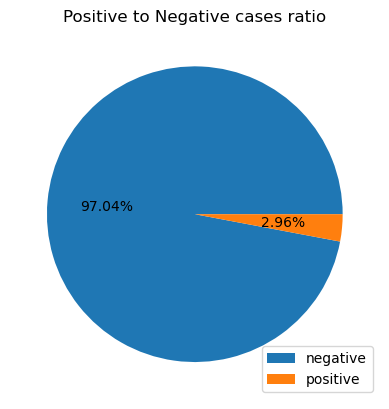

In [4]:
import matplotlib.pyplot as plt
counts = dataset["Class"].value_counts()
plt.pie(counts, autopct="%0.2f%%")
plt.legend(counts.index)
plt.title("Positive to Negative cases ratio")
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categoricals = ["Class"]
for i in categoricals:
    dataset[i] = le.fit_transform(dataset[i])
dataset.head()

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,0
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,0
2,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,0
3,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,0
4,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,0


In [6]:
# Replace the name of one column
new_column_name = "result"  # Replace with your desired column name
column_to_replace = "Class"  # Replace with the name of the column you want to replace
dataset.rename(columns={column_to_replace: new_column_name}, inplace=True)

In [7]:
dataset.head()

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,result
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,0
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,0
2,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,0
3,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,0
4,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=['result']), dataset['result'], test_size=0.25)
X_train,y_train

(       Mcg   Gvh   Alm   Mit  Erl  Pox   Vac   Nuc
 913   0.38  0.58  0.46  0.21  0.5  0.0  0.52  0.22
 178   0.47  0.54  0.37  0.14  0.5  0.0  0.50  0.22
 369   0.50  0.53  0.45  0.44  0.5  0.0  0.49  0.22
 974   0.25  0.48  0.45  0.32  0.5  0.0  0.40  0.22
 97    0.47  0.47  0.57  0.48  0.5  0.0  0.48  0.22
 ...    ...   ...   ...   ...  ...  ...   ...   ...
 1150  0.60  0.68  0.30  0.27  0.5  0.0  0.55  0.22
 773   0.61  0.53  0.59  0.17  0.5  0.0  0.44  0.28
 873   0.47  0.50  0.47  0.22  0.5  0.0  0.53  0.45
 1255  0.70  0.69  0.43  0.33  0.5  0.0  0.58  0.22
 1423  0.23  0.13  0.51  0.16  0.5  0.0  0.53  0.51
 
 [1113 rows x 8 columns],
 913     0
 178     0
 369     0
 974     0
 97      0
        ..
 1150    0
 773     0
 873     0
 1255    1
 1423    0
 Name: result, Length: 1113, dtype: int32)

In [9]:
training_data=X_train.assign(result=y_train)
training_data

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,result
913,0.38,0.58,0.46,0.21,0.5,0.0,0.52,0.22,0
178,0.47,0.54,0.37,0.14,0.5,0.0,0.50,0.22,0
369,0.50,0.53,0.45,0.44,0.5,0.0,0.49,0.22,0
974,0.25,0.48,0.45,0.32,0.5,0.0,0.40,0.22,0
97,0.47,0.47,0.57,0.48,0.5,0.0,0.48,0.22,0
...,...,...,...,...,...,...,...,...,...
1150,0.60,0.68,0.30,0.27,0.5,0.0,0.55,0.22,0
773,0.61,0.53,0.59,0.17,0.5,0.0,0.44,0.28,0
873,0.47,0.50,0.47,0.22,0.5,0.0,0.53,0.45,0
1255,0.70,0.69,0.43,0.33,0.5,0.0,0.58,0.22,1


In [10]:
testing_data=X_test.assign(result=y_test)
testing_data

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,result
226,0.39,0.45,0.53,0.18,0.5,0.0,0.54,0.22,0
1135,0.63,0.65,0.42,0.18,0.5,0.0,0.54,0.27,0
1311,0.65,0.53,0.55,0.52,0.5,0.0,0.47,0.27,0
173,0.35,0.66,0.49,0.21,0.5,0.0,0.54,0.25,0
1048,0.47,0.46,0.49,0.27,0.5,0.0,0.59,0.22,0
...,...,...,...,...,...,...,...,...,...
1136,0.47,0.40,0.63,0.19,0.5,0.0,0.52,0.32,0
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,0
100,0.55,0.53,0.55,0.46,0.5,0.0,0.52,0.22,0
506,0.55,0.59,0.47,0.64,0.5,0.0,0.54,0.33,0


In [11]:
testing_data.to_csv("DataSets/yeast5_test.csv")

In [12]:
class_minority_df=training_data[training_data['result']==1]
class_minority_df.shape

(36, 9)

In [13]:
class_minority_df.head()

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,result
863,0.85,0.69,0.34,0.31,0.5,0.0,0.57,0.30,1
406,0.84,0.87,0.45,0.54,0.5,0.0,0.28,0.22,1
154,0.75,0.70,0.38,0.27,0.5,0.0,0.49,0.22,1
825,0.77,0.86,0.44,0.27,0.5,0.0,0.48,0.22,1
26,0.80,0.88,0.36,0.39,0.5,0.0,0.56,0.33,1


In [14]:
class_majority_df=training_data[training_data['result']==0]
print(class_majority_df.shape)
class_majority_df.head()


(1077, 9)


,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,result
913,0.38,0.58,0.46,0.21,0.5,0.0,0.52,0.22,0
178,0.47,0.54,0.37,0.14,0.5,0.0,0.50,0.22,0
369,0.50,0.53,0.45,0.44,0.5,0.0,0.49,0.22,0
974,0.25,0.48,0.45,0.32,0.5,0.0,0.40,0.22,0
97,0.47,0.47,0.57,0.48,0.5,0.0,0.48,0.22,0


In [15]:
class_majority_df.to_csv('DataSets/yeast5_majority.csv')
class_minority_df.to_csv('DataSets/yeast5_minority.csv')